<a href="https://colab.research.google.com/github/snehaangeline/Lora/blob/main/Lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

In [ ]:
!pip install pandas==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.5 MB 2.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


## Data Exploration

In [ ]:
df = pd.read_excel("/content/sample_data/lorawan_dataset.xls")

In [ ]:
df = df.rename(columns={"SPREADING FACTOR":"SPREAD","DEVICE ID":"ID",'AIR TIME ':"TIME"})

In [ ]:
df.drop(['BW',"DISTANCE FROM GATEWAY"], axis=1, inplace=True)

In [ ]:
df['min'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.minute
df['sec'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.second
df["min"] = df["min"].values*60
df["SECONDS"] = df["min"] + df["sec"]
df.drop((['sec',"min","TIME"]), axis=1, inplace=True)

## Outlier dropping

In [ ]:
df[df["RSSI"]==0]

,ID,RSSI,SNR,FREQ,SPREAD,TIME STAMP,SECONDS
181,16,0,0.0,0,12,03:16:36,7


In [ ]:
df.drop(df.index[367],axis = 0,inplace = True)

# Data  Preprocessing

In [ ]:
# Feature selection
X = df.iloc[:,1:3]

In [ ]:
cols = X.columns

In [ ]:
pca = PCA(2)
X = pca.fit_transform(X)

## Elbow Value

In [ ]:
import warnings

warnings.filterwarnings('ignore')

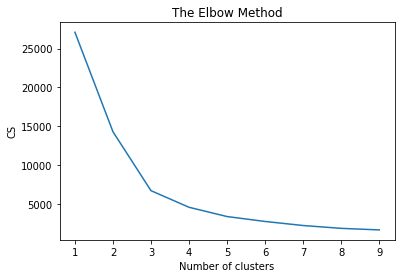

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Model Train

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 4)


In [ ]:
label = kmeans.fit_predict(X)

In [ ]:
label = list(label)

In [ ]:
data = df.iloc[:,1:3]

In [ ]:
data["Label"] = label

In [ ]:
df["Label"] = label

In [ ]:
data

,RSSI,SNR,Label
0,-113,-3.8,2
1,-114,-4.3,2
2,-113,-3.0,2
3,-113,-7.0,0
4,-114,-10.8,3
...,...,...,...
617,-114,-8.3,0
618,-113,-2.5,2
619,-115,-11.3,3
620,-115,-11.5,3


In [ ]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2, 3], dtype=int32)

## Data Visualization

Text(0, 0.5, 'SNR')

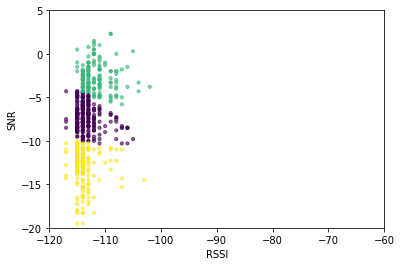

In [ ]:
plt.scatter(data["RSSI"], data["SNR"], c=data["Label"],alpha = 0.6, s=10)
plt.xlim(-120, -60)
plt.ylim(-20, 5)
plt.xlabel("RSSI")
plt.ylabel("SNR")

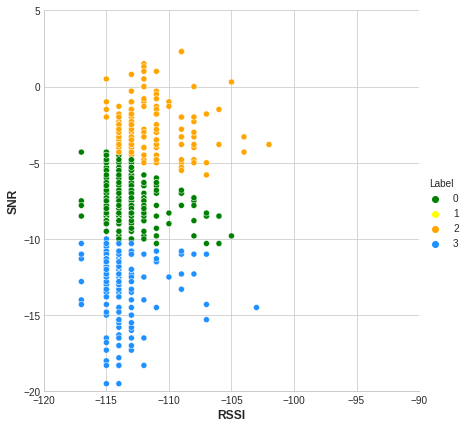

In [ ]:
from matplotlib.colors import Colormap
plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x=df.RSSI, y=df.SNR, hue=data.Label, data=df, height=6, palette = ["green", "yellow", "orange", "dodgerblue"])
plt.xlim(-120, -90)
plt.ylim(-20, 5)
plt.show()

In [ ]:
df

,ID,RSSI,SNR,FREQ,SPREAD,TIME STAMP,SECONDS,Label
0,1,-113,-3.8,868500000,11,00:41:46,0,2
1,1,-114,-4.3,868100000,11,00:43:17,8,2
2,1,-113,-3.0,868100000,7,01:15:31,13,2
3,1,-113,-7.0,868500000,12,01:37:45,8,0
4,1,-114,-10.8,868300000,11,03:58:40,8,3
...,...,...,...,...,...,...,...,...
617,50,-114,-8.3,868100000,8,03:12:27,72,0
618,50,-113,-2.5,868100000,12,03:52:44,60,2
619,50,-115,-11.3,868100000,11,05:24:37,107,3
620,50,-115,-11.5,868100000,10,05:30:31,60,3


In [ ]:
df.to_excel("df.xlsx")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 0 to 621
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          621 non-null    int64  
 1   RSSI        621 non-null    int64  
 2   SNR         621 non-null    float64
 3   FREQ        621 non-null    int64  
 4   SPREAD      621 non-null    int64  
 5   TIME STAMP  621 non-null    object 
 6   SECONDS     621 non-null    int64  
 7   Label       621 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 63.7+ KB


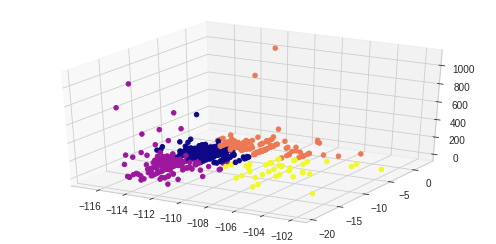

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df.RSSI
y = df.SNR
z = df.SECONDS
c = df.Label
img = ax.scatter(x, y, z, c=c, cmap='plasma', alpha=1)
plt.show()

In [ ]:
import plotly.express as px
df["Label"] = df["Label"].astype(str)
fig = px.scatter_3d(df, x='RSSI', y='SNR', z='SECONDS',
              color='Label')
fig.show()

In [ ]:
df.drop(df[df["SECONDS"] > 120].index,inplace = True)

In [ ]:
import plotly.express as px
df["Label"] = df["Label"].astype(str)
fig = px.scatter_3d(df, x='RSSI', y='SNR', z='SECONDS',
              color='Label')
fig.show()

## EVALUATION

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print("The Silhouette Score for the model is ", round(score,1))

The Silhouette Score for the model is  0.5
